In [1]:
# !pip install numpy scipy pandas matplotlib scikit-learn seaborn

# Dataframe schema

In [2]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn import naive_bayes
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import seaborn as sns

# Read Csv File
df = pd.read_csv('drive/MyDrive/Colab Notebooks/NSL_KDD_Full.csv')
# Read the second CSV file into a DataFrame
# df2 = pd.read_csv('drive/MyDrive/Colab Notebooks/NSL_KDD_Test.csv')

# drop duplicate rows based on all columns
df.drop_duplicates(inplace=True)

print(df.head())


# Encode Variable Function
def endoce_variable(df):
    """
    Attach numerical value to categorical value of features for when
    we want to use it in knn.
    """
    for header in df:
        header_dict = {}
        counter = 0
        temp = None
        temp_list = []
        for item in df[header]:
            if item != temp and item not in temp_list and temp is not float:
                temp = item
                header_dict.update({temp: counter})
                counter +=1
                temp_list.append(temp)
        df[header].replace(header_dict, inplace=True)

    return df


# Define the function to calculate the length of each name
def calculate_is_attack_or_not(attack_category):
    if attack_category=='normal':
      return 0
    return 1

# Loop through the DataFrame and append a new column with the name length to each row
labels = []
for index, row in df.iterrows():
    labels.append(calculate_is_attack_or_not(row.iloc[-1]))
    # print(row.iloc[-1])

df['label'] = labels
y = df['label']


print(df.head())

   0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5  ...   25  0.17  0.03  \
0  0  udp    other   SF  146     0    0    0    0    0  ...    1  0.00  0.60   
1  0  tcp  private   S0    0     0    0    0    0    0  ...   26  0.10  0.05   
2  0  tcp     http   SF  232  8153    0    0    0    0  ...  255  1.00  0.00   
3  0  tcp     http   SF  199   420    0    0    0    0  ...  255  1.00  0.00   
4  0  tcp  private  REJ    0     0    0    0    0    0  ...   19  0.07  0.07   

   0.17.1  0.25  0.26  0.27  0.05  0.28   normal  
0    0.88  0.00  0.00  0.00   0.0  0.00   normal  
1    0.00  0.00  1.00  1.00   0.0  0.00  neptune  
2    0.03  0.04  0.03  0.01   0.0  0.01   normal  
3    0.00  0.00  0.00  0.00   0.0  0.00   normal  
4    0.00  0.00  0.00  0.00   1.0  1.00  neptune  

[5 rows x 42 columns]
   0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5  ...  0.17  0.03  \
0  0  udp    other   SF  146     0    0    0    0    0  ...  0.00  0.60   
1  0  tcp  private   S0    0     0    0 

# Dataframe schema after seprating label

In [3]:
# cap_shape
# cap_shape_dict = {'b': 1, 'c': 2, 'x': 3, 'f': 4, "k": 5, "s": 6}
# df["cap-shape"].replace(cap_shape_dict, inplace=True)
df = endoce_variable(df)



columns = []
for header in df:
    columns.append(header)
columns.remove("label")
columns.remove("normal")
X = df[columns]



# df.iloc[:, df.shape[1]:] = pd.DataFrame(labels)
# print(labels)
print(X.head())
print(y.head())

   0  tcp  ftp_data  SF  491  0.1  0.2  0.3  0.4  0.5  ...  150  25  0.17  \
0  0    0         0   0    0    0    0    0    0    0  ...    0   0   0.0   
1  0    1         1   1    1    0    0    0    0    0  ...    0   1   1.0   
2  0    1         2   0    2    1    0    0    0    0  ...    1   2   2.0   
3  0    1         2   0    3    2    0    0    0    0  ...    0   2   2.0   
4  0    1         1   2    1    0    0    0    0    0  ...    0   3   3.0   

   0.03  0.17.1  0.25  0.26  0.27  0.05  0.28  
0   0.0     0.0   0.0   0.0   0.0   0.0   0.0  
1   1.0     1.0   0.0   1.0   1.0   0.0   0.0  
2   2.0     2.0   1.0   2.0   2.0   0.0   1.0  
3   2.0     1.0   0.0   0.0   0.0   0.0   0.0  
4   3.0     1.0   0.0   0.0   0.0   1.0   2.0  

[5 rows x 41 columns]
0    0
1    1
2    0
3    0
4    1
Name: label, dtype: int64


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11512
           1       0.98      0.97      0.97     10674

    accuracy                           0.97     22186
   macro avg       0.97      0.97      0.97     22186
weighted avg       0.97      0.97      0.97     22186

Confusion Matrix:
[[11248   264]
 [  305 10369]]


<Axes: >

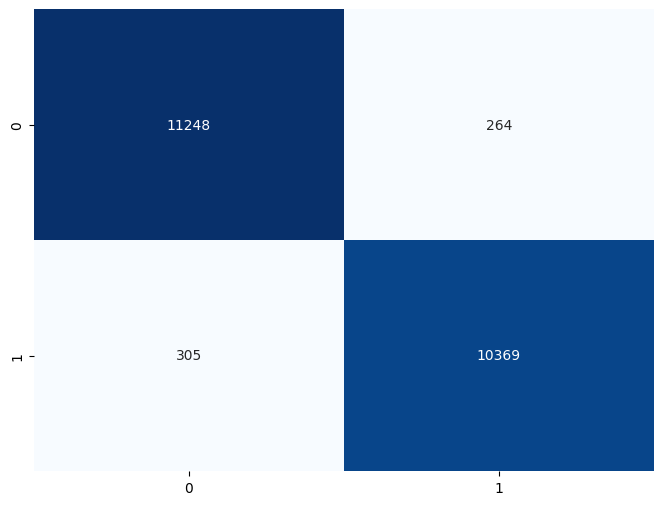

In [4]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)


# ####
# KNN
# ####

# Importing and fitting KNN classifier for k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
# Predicting results using Test data set
pred_knn = knn.predict(X_test)


print("Classification Report")
print(classification_report(y_test, pred_knn, zero_division=0))

cm = confusion_matrix(y_test, pred_knn)
print("Confusion Matrix:")
print(cm)

###########################################

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.show()

In [6]:
print(type(X_test))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# Attack predict test

In [7]:
# 0,'tcp','http','SF',313,7524,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,1,0,0,35,239,1,0,0.03,0.03,0,0,0,0,
request_sample = pd.DataFrame([[0,'tcp','whois','REJ',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,244,11,0,0,1,1,0.05,0.07,0,255,11,0.04,0.07,0,0,0,0,1,1,],#neptune
                               [0,'tcp','http','SF',214,306,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,25,0,0,0,0.04,1,0,0.28,48,255,1,0,0.02,0.03,0,0,0,0,],#normal
                               [0,'tcp','other','REJ',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,436,1,0.06,0,0.94,1,0,1,0,255,1,0,1,0,0,0.04,0,0.96,1,],#saint
                               [0,'udp','private','SF',105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,1,0,0,255,253,0.99,0.01,0,0,0,0,0,0,],#normal
                               [0,'tcp','telnet','SF',129,174,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,255,220,0.86,0.02,0,0,0,0,0.02,0.03,]])#guess_passwd
is_attack = knn.predict(endoce_variable(request_sample))
print(is_attack)


[1 1 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Test another neighber number

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11512
           1       0.98      0.97      0.97     10674

    accuracy                           0.97     22186
   macro avg       0.97      0.97      0.97     22186
weighted avg       0.97      0.97      0.97     22186

Confusion Matrix:
[[11248   264]
 [  305 10369]]
>>> 1 >>> ____________________ 


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11512
           1       0.98      0.97      0.97     10674

    accuracy                           0.97     22186
   macro avg       0.97      0.97      0.97     22186
weighted avg       0.97      0.97      0.97     22186

Confusion Matrix:
[[11248   264]
 [  305 10369]]
>>> 2 >>> ____________________ 


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11512
     

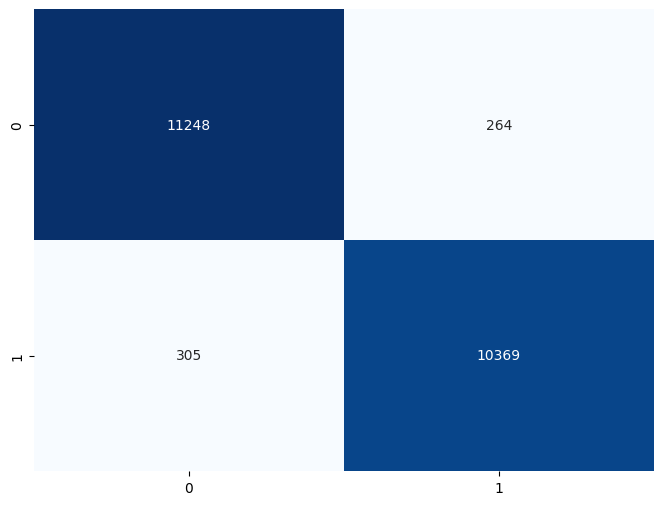

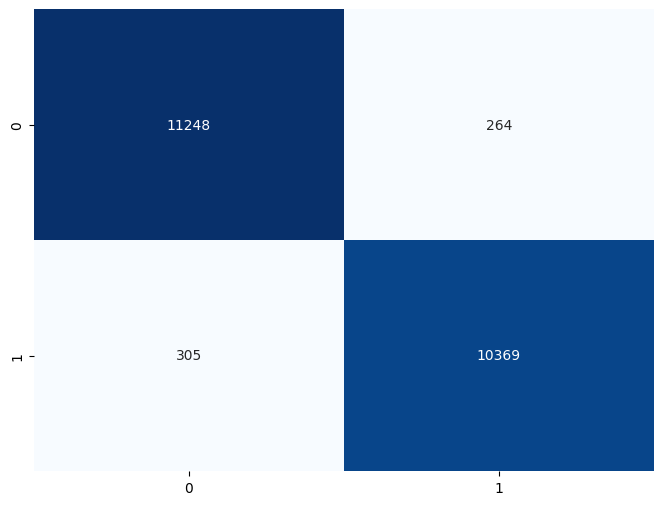

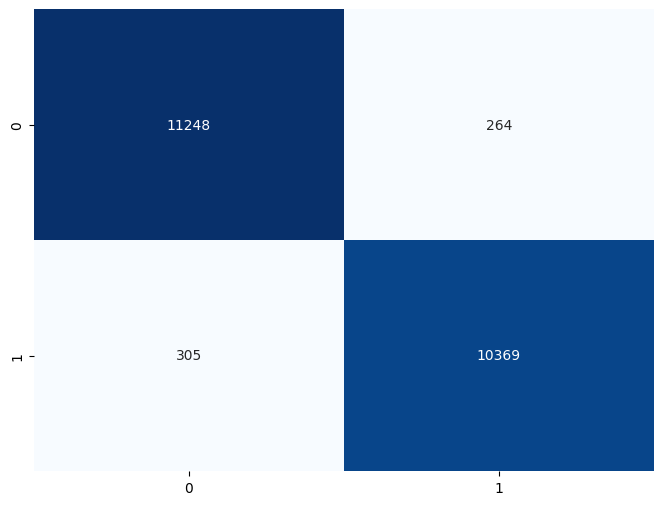

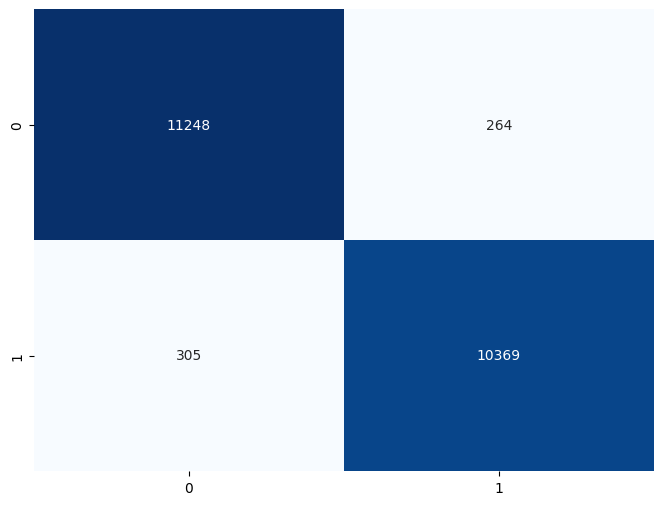

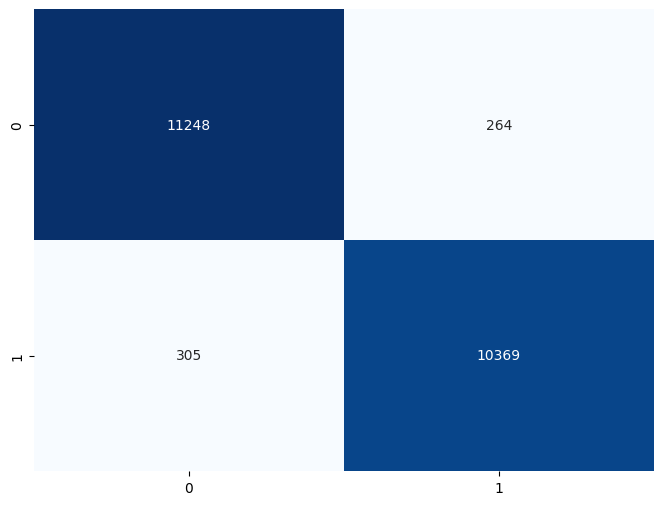

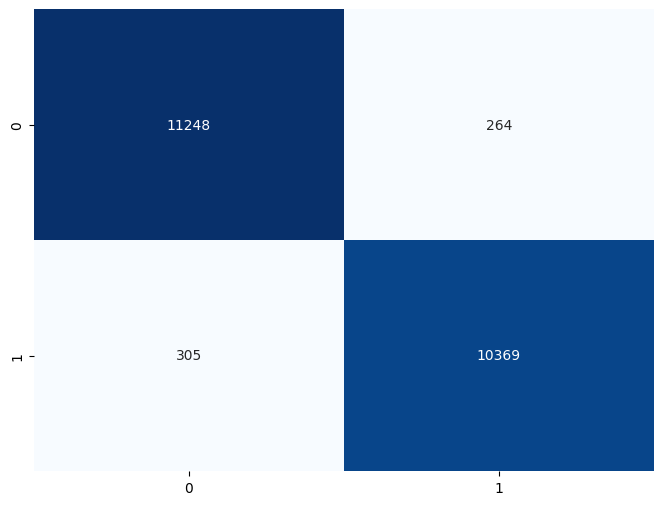

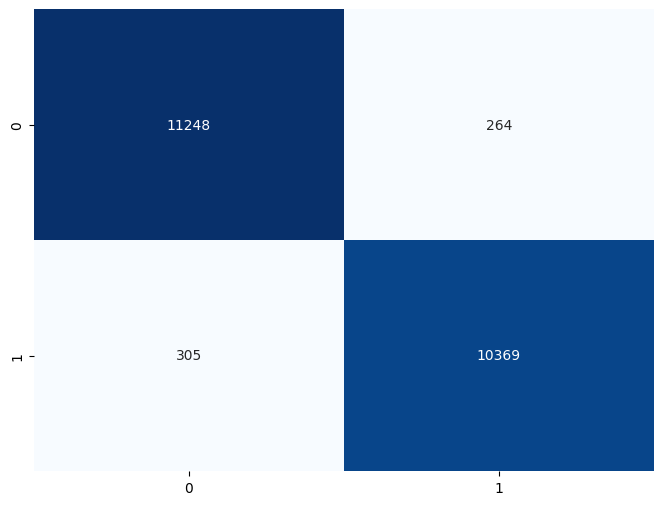

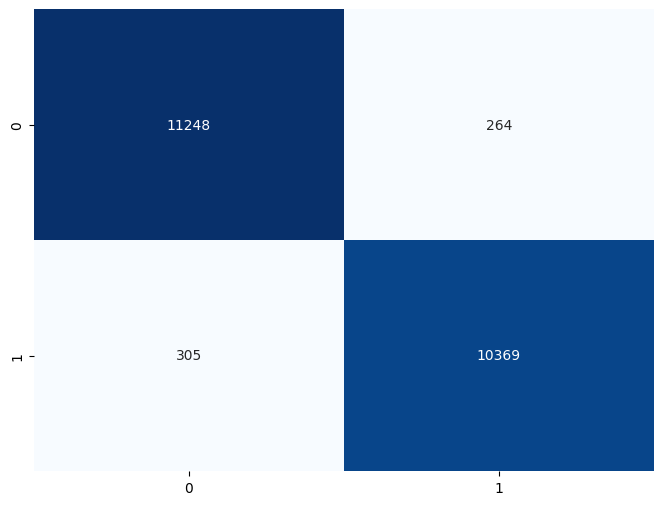

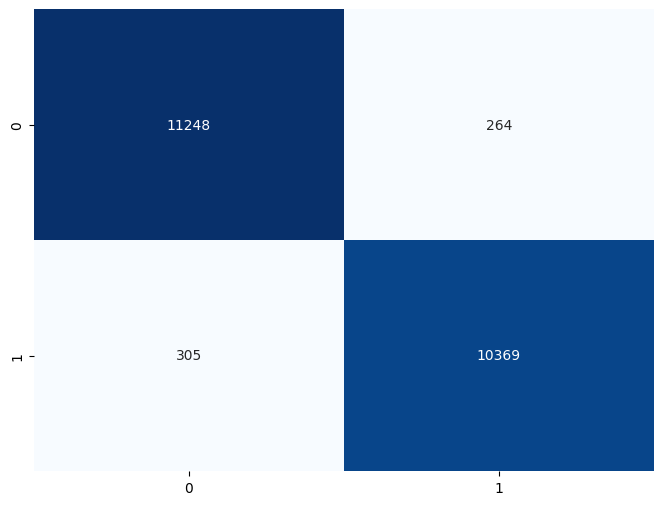

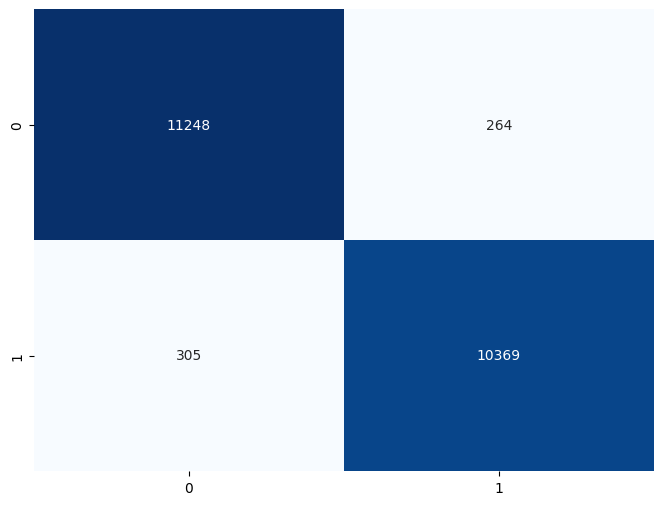

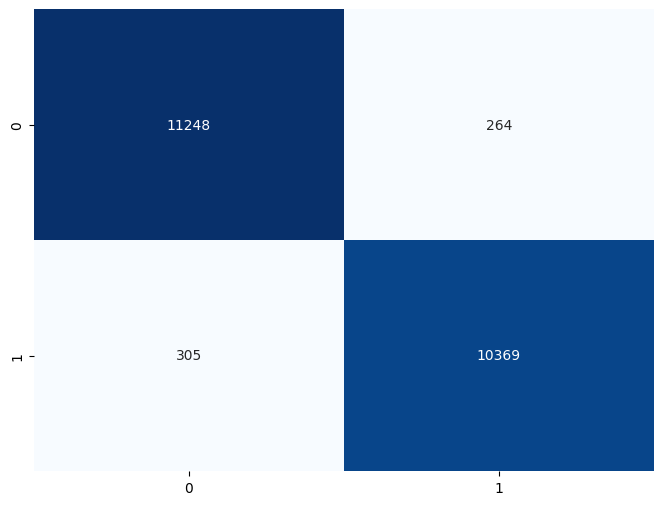

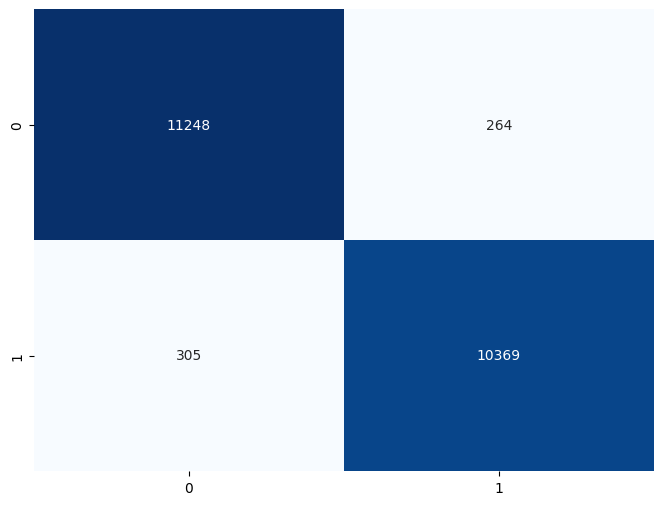

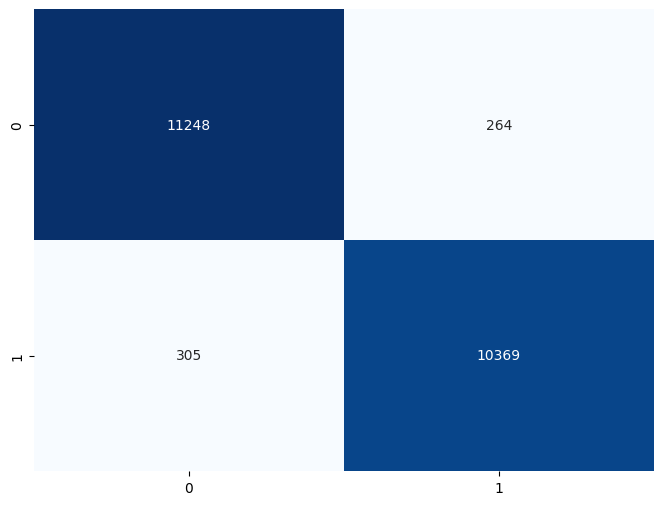

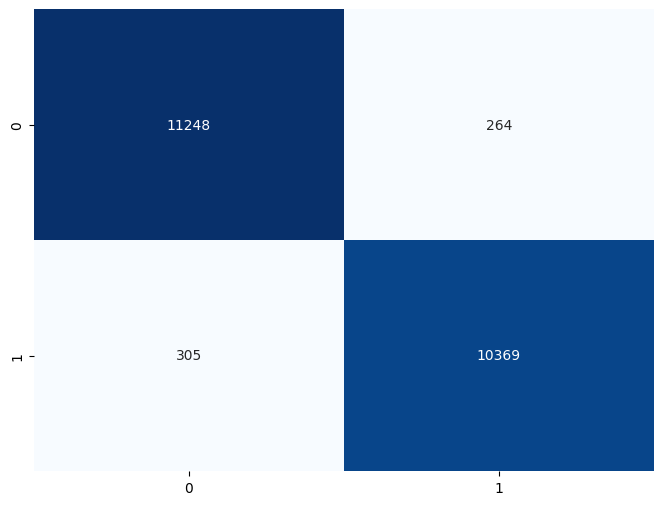

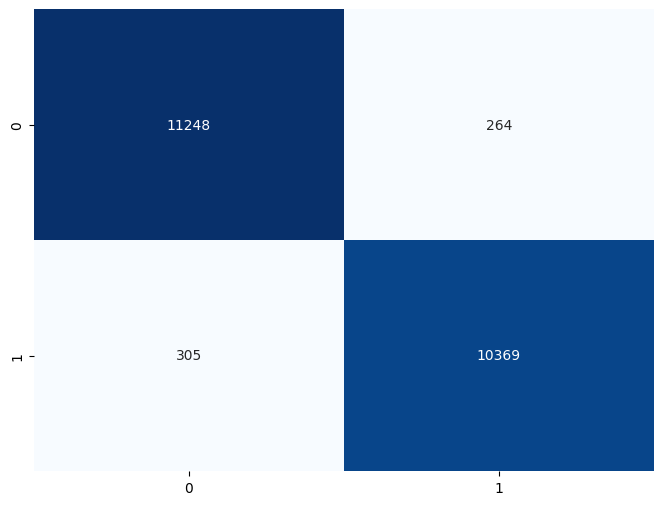

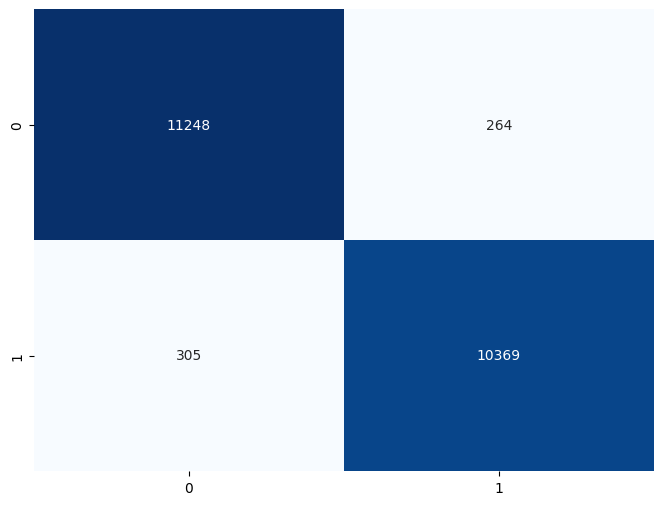

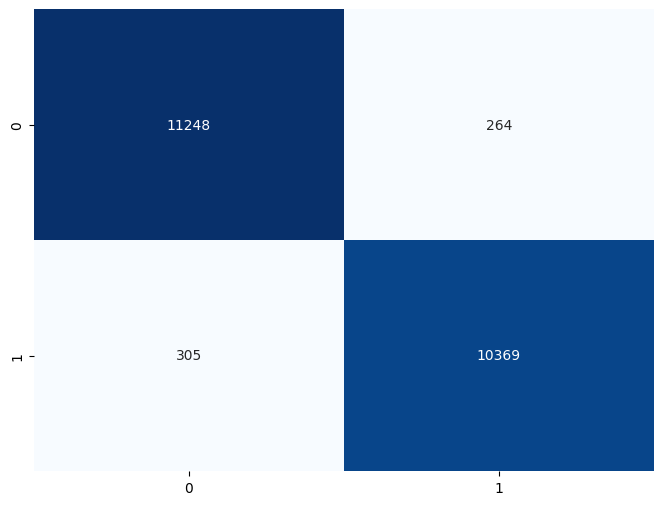

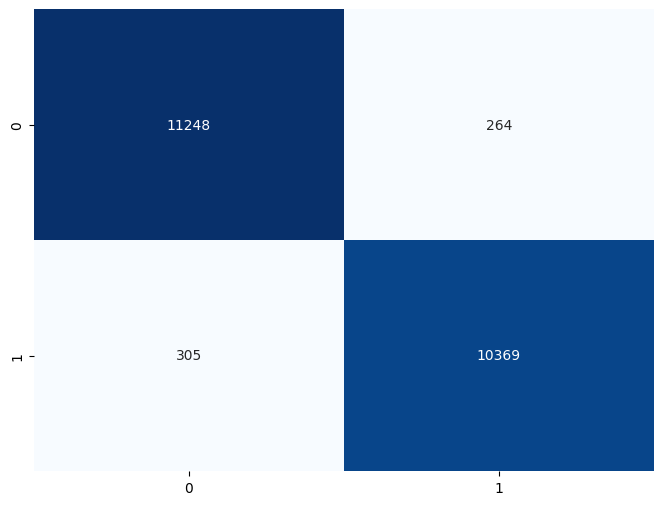

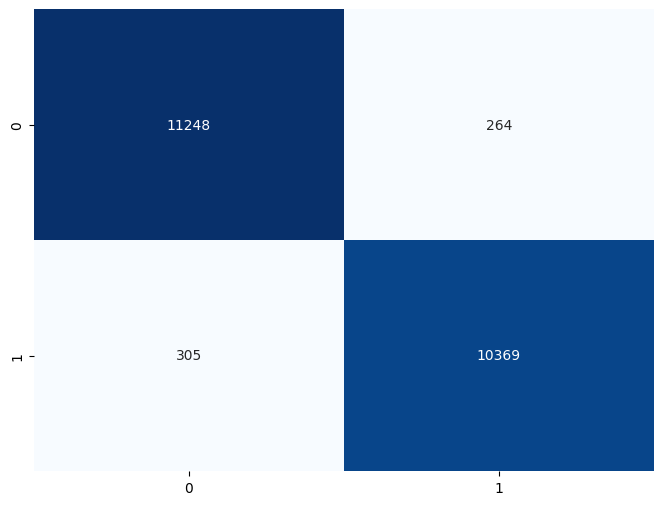

In [8]:
def main(n_neighbors=2):
  """
  A function for testing each number of neighber for our problem.
  """
  # Splitting data into train and test
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.15, random_state=42)


  # #####
  # # KNN
  # #####

  # Importing and fitting KNN classifier for k=3
  knn = KNeighborsClassifier(n_neighbors=3)
  knn.fit(X_train, y_train)
  # Predicting results using Test data set
  pred_knn = knn.predict(X_test)


  print("Classification Report")
  print(classification_report(y_test, pred_knn, zero_division=0))

  # cm = confusion_matrix(y_test, pred_knn)
  # print("Confusion Matrix:")
  # print(cm)

  ###########################################

  # Create a heatmap using seaborn
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)


for i in range(1,20):
  main(i)
  print('>>>',i,'>>>','_'*20,'\n\n')